<a href="https://colab.research.google.com/github/pradyumn280899/Airbnb-Bookings-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [5]:
pip install geopandas

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import point, polygon
from wordcloud import WordCloud
sns.set_style("whitegrid", {'grid.linestyle': ''})
sns.set(rc={'figure.figsize':(16.7,8.27)})
%matplotlib inline

**Aquaring and loading data**

Loading a data into appropriate format for analysis.






In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
working_path = '/content/drive/MyDrive/alma better/capstone project/EDA/'

In [8]:
df = pd.read_csv(working_path+'Airbnb NYC 2019.csv')
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [9]:
# Define the path where data is kept
df = pd.read_csv(working_path+'Airbnb NYC 2019.csv')
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [10]:
df_with_na = df.copy()

In [11]:
# checking basic information about dataset like number of columns and rows, data type total number of nullll value. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**After loading dataset and from looking of head and info of data. we can see number of things.**

---
1. NaN value
2. most number of NaN value present in last_review and 'review_per_month' column
3. dataset divided into numerical and catogorical datatype.
4. 48895 rows and 16 columns

we need to do data cleaning data and ir must tb handle NaN value before data exploration. 

**univariant analysis**

---

 **column No 1: Name** 

 This column contains the name(description) of the property which the host is giving on rent by which he can draw the customer's attention.






In [12]:
# geting the number of unique names from the name column
df.name.nunique()


47905

In [13]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

**Column No. 2 & 3 : host_id, host_name**

Observations

1. This column contains all the unique names of hosts. We observe in all 8214 different hosts names in this database.
2. By comparing the unique numbers of host and host ID it can be concluded that there are many hosts with the same name.
3. So we will use host id for all further analysis.

In [14]:
df.host_id

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64

In [15]:
# geting the number of unique id from the host_id column
df.host_id.nunique()

37457

This column contains all the unique id hosts there are a total of 21808 hosts in the database.

In [17]:
df.host_name

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [18]:
# geting the number of unique host name from the host_name column 
df.host_name.nunique()

11452

**Column No. 4 : neighbourhood_group**

we can see that most no of rooms are in manhattan followed by brooklyn and queens 

In [19]:
# geting unique neighborhood groups from the neighborhood_groups column 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


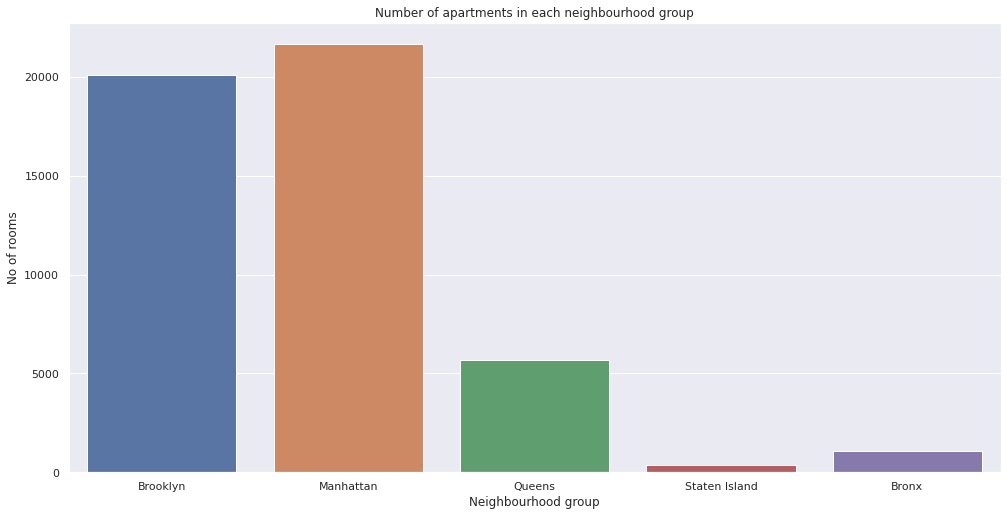

In [20]:
# creating a count plot
sns.countplot(df.neighbourhood_group).set_title('Number of apartments in each neighbourhood group')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.xlabel('Neighbourhood group')
plt.show()

**Column NO. 5 : neighbourhood**

**Their are a total of 219 unique neighbourhood area.**
1. Willamsburg, Bedford and Bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. Astoria, Flushing and Long Island city have most no of bookings in Queens neighbourhood_group
4. Tompkinsville, St.George, Cancaord ave most no of bookings in Staten_Island neighbourhood_group
5. Bronx neighbourhood_group all the neighbourhood have almost equal no of bookings.

In [21]:
df.neighbourhood.nunique()

221

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


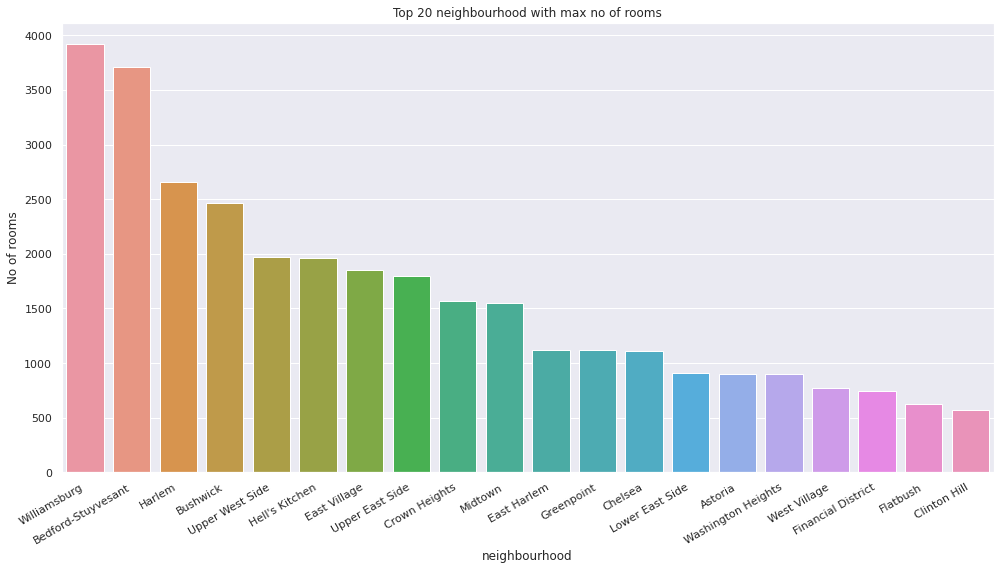

<Figure size 1202.4x595.44 with 0 Axes>

In [22]:
#creating a count plot
sns.countplot(df.neighbourhood, order = df.neighbourhood.value_counts().iloc[:20].index ).set_title('Top 20 neighbourhood with max no of rooms')
#rotating the x axis labels 
plt.xticks(rotation=30,ha='right')
#adding x and y labels to the plot
plt.ylabel('No of rooms')
plt.figure(figsize=(16.7,8.27)) 
plt.show()

In [23]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
#storing all the diffrent neighbourhood groups to diffrent data frames 
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']
Queens_group_df=df.loc[df['neighbourhood_group']== 'Queens']
Staten_Island_group_df=df.loc[df['neighbourhood_group']== 'Staten Island']
Bronx_group_df=df.loc[df['neighbourhood_group']== 'Bronx']

Text(0.5, 0, 'No of rooms')

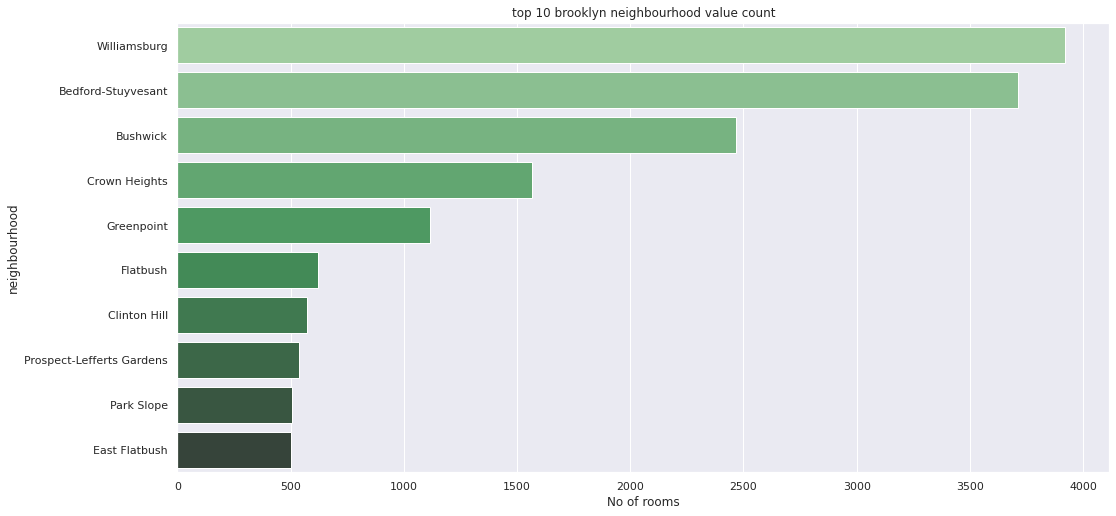

In [25]:
# top 10 areas in brooklyn with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

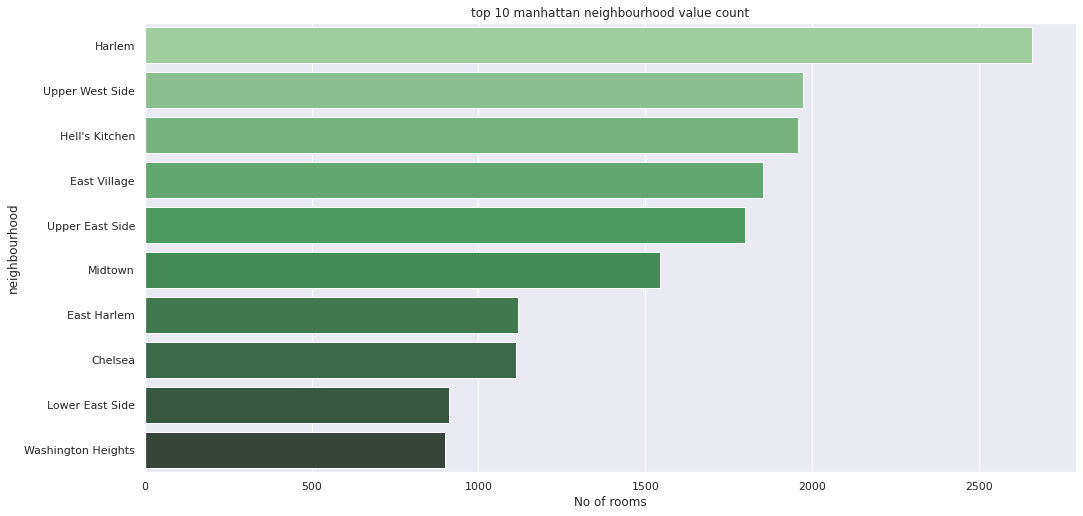

In [26]:
# top 10 areas in manhattan with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

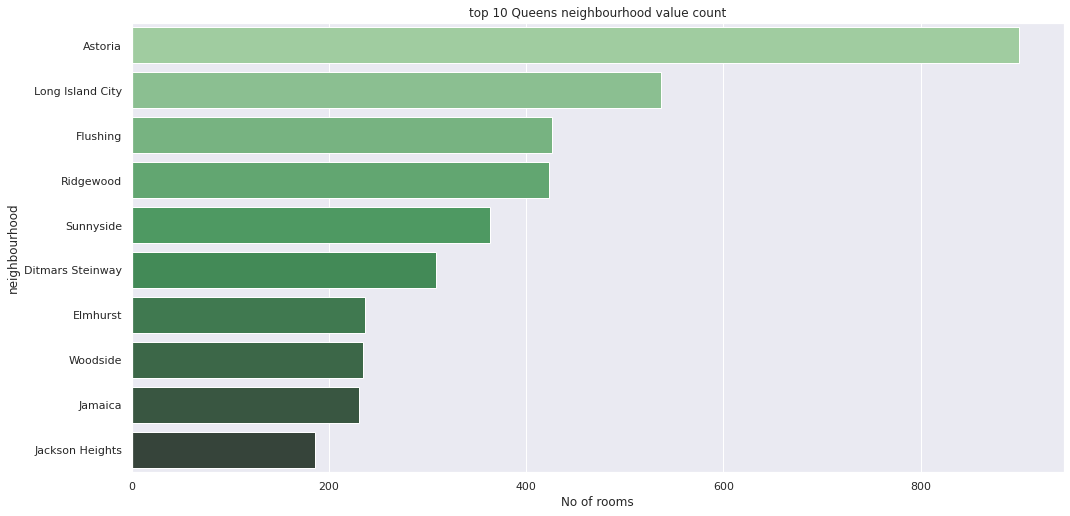

In [27]:
# top 10 areas in Queens with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Queens_group_df, palette="Greens_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')
#adding x and y labels to the plot
plt.xlabel('No of rooms')

Text(0.5, 0, 'No of rooms')

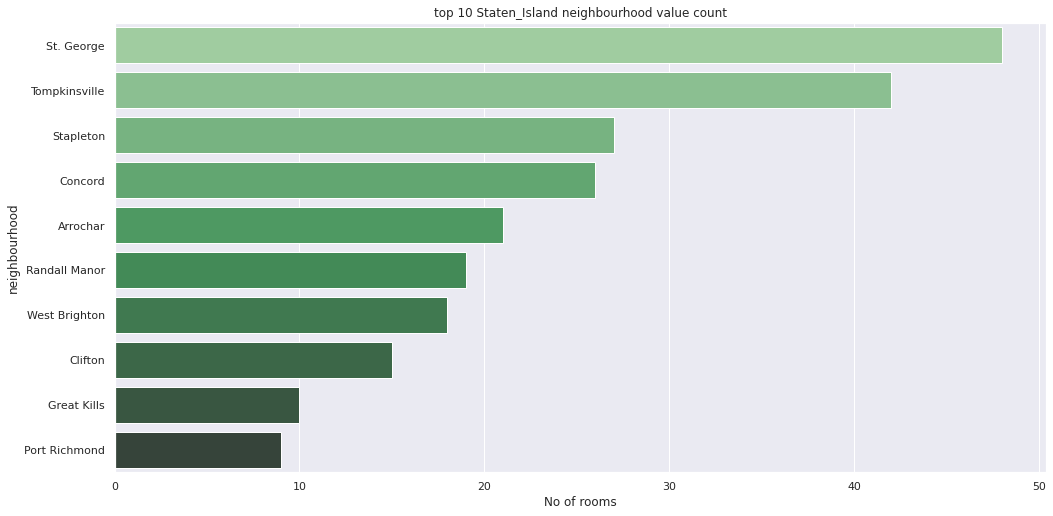

In [28]:
# top 10 areas in Staten_Island with most booking
#creating a count plot

sns.countplot(y="neighbourhood", data=Staten_Island_group_df, palette="Greens_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')    

Text(0.5, 0, 'No of rooms')

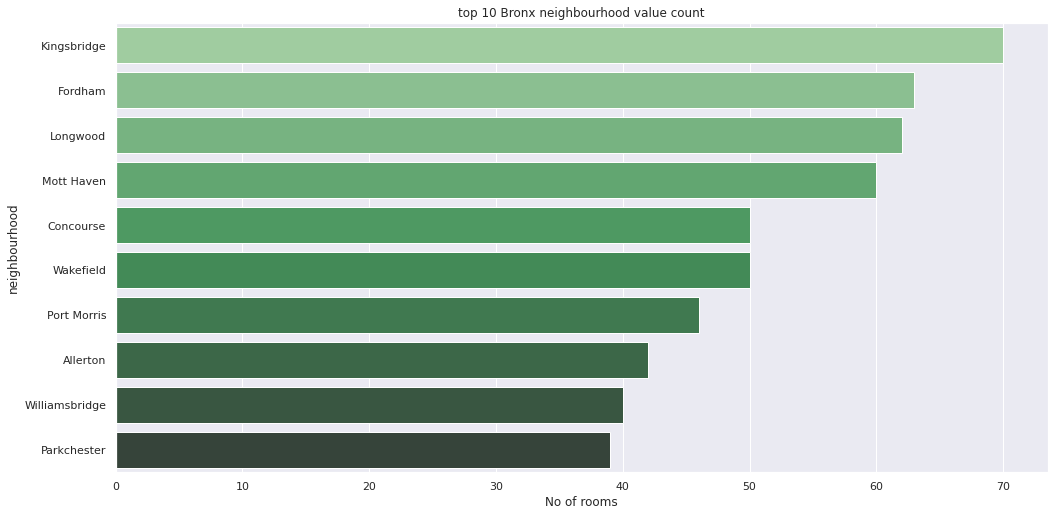

In [29]:
#top 10 areas in Staten_Island with most booking
#creating a count plot
sns.countplot(y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

#adding x and y labels to the plot
plt.xlabel('No of rooms')     

Text(0.5, 1.0, 'top 10 Bronx neighbourhood value count')

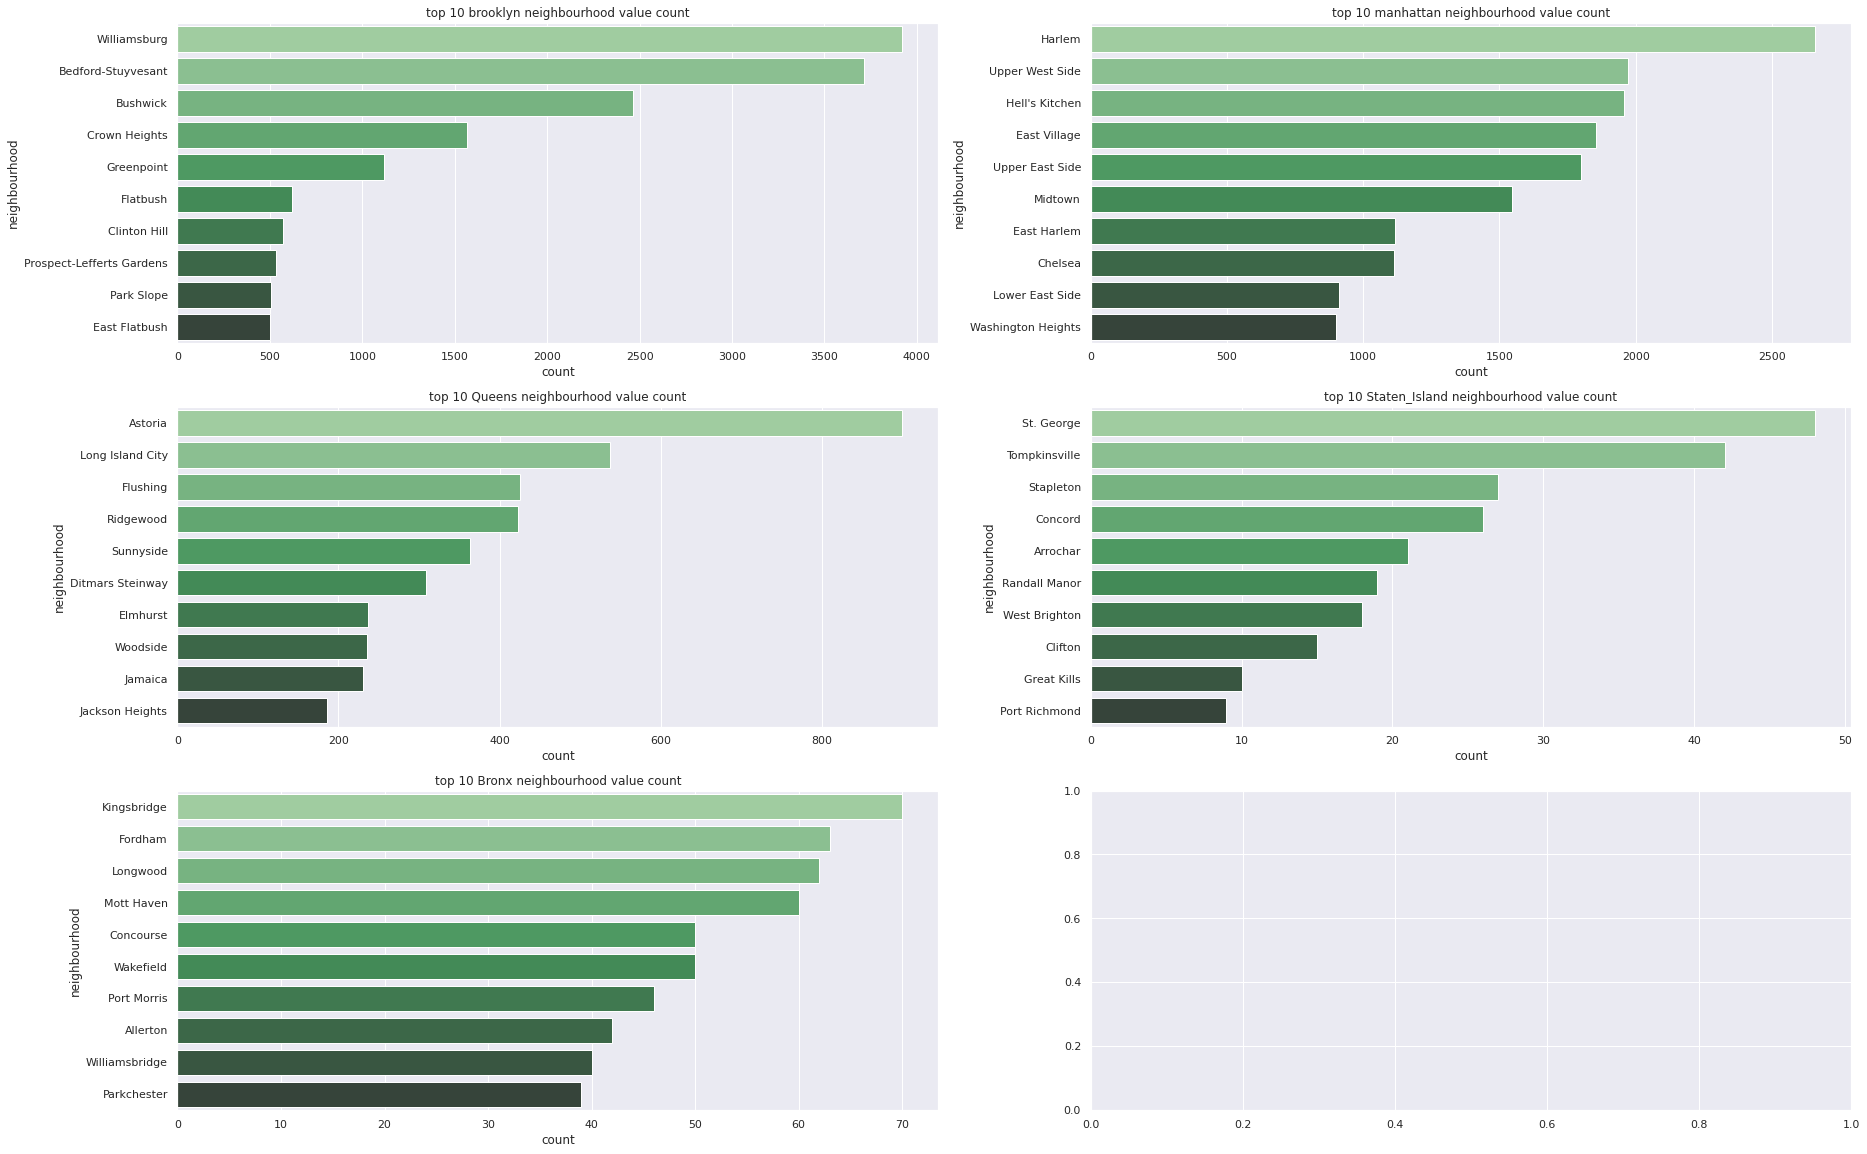

In [30]:
# creating subplots to plot all the graphs together 
fig, axes = plt.subplots(3,2, figsize=(30, 20))
sns.countplot(ax=axes[0,0],y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')
              
sns.countplot(ax=axes[0,1],y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')

sns.countplot(ax=axes[1,0],y="neighbourhood", data=Queens_group_df, palette="Greens_d",
              order=Queens_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Queens neighbourhood value count')

sns.countplot(ax=axes[1,1],y="neighbourhood", data=Staten_Island_group_df, palette="Greens_d",
              order=Staten_Island_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Staten_Island neighbourhood value count')

sns.countplot(ax=axes[2,0],y="neighbourhood", data=Bronx_group_df, palette="Greens_d",
              order=Bronx_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 Bronx neighbourhood value count')

Observations

1. willamsburg, bedford and bushwick have most no of bookings in brooklyn neighbourhood_group
2. Harlem, Upper West Side and Hell's Kitchen have most no of bookings in manhattan neighbourhood_group
3. astoria, flushing and long island city have most no of bookings in Queens neighbourhood_group
4. tompkinsville, St.George, cancaord ave most no of bookings in Staten_Island neighbourhood_group
5. in bronx neighbourhood_group all the neighbourhood have almost equal no of bookings

**Column NO. 6 & 7 : latitude & longitude**

In [31]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

In [32]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

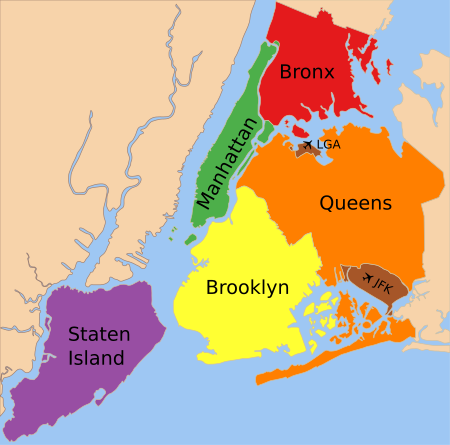

Text(0.5, 1.0, 'Density of rooms')

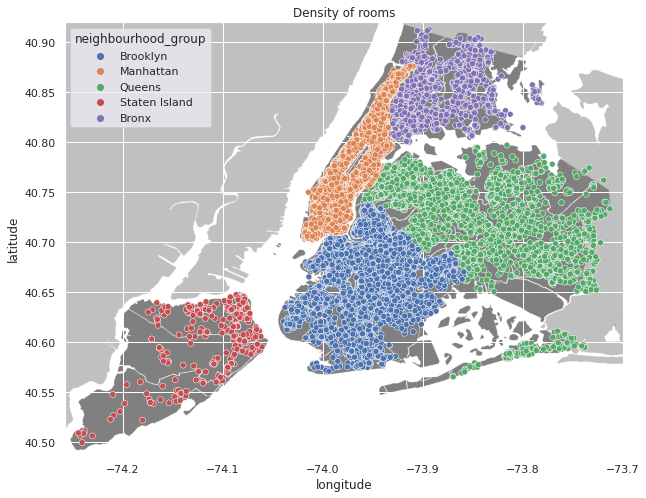

In [33]:
data = df[["latitude","longitude",'neighbourhood_group']]
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#adding the image from wikipedia
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
#reading the image
image=plt.imread(img)
#scaling img with max latitude and logtitude and makeig some minor adgustment to fit the points
plt.imshow(image,zorder=0,extent=[-74.258, -73.7, 40.488, 40.92])
#creating an scaterplot
sns.scatterplot(data = data,x='longitude',y='latitude',hue='neighbourhood_group').set_title('Density of rooms')

**Column NO. 8 : Room Type**
1. Customer prefer entire home/apt or private room. only very few customer prefer to book shared rooms.



Text(0.5, 0, 'Type of rooms')

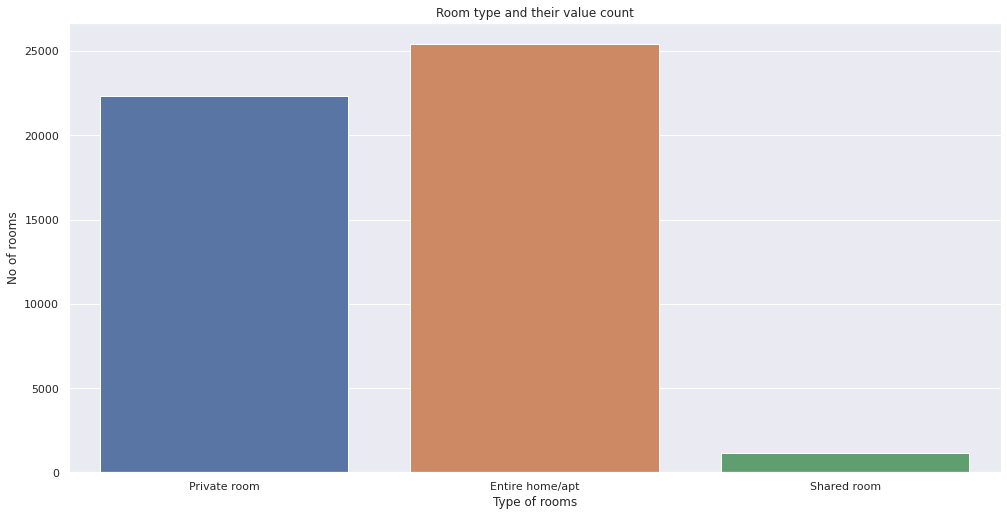

In [34]:
#creating a count plot
sns.countplot(x=df['room_type']).set_title('Room type and their value count')
#adding x and y labels to the plot
plt.ylabel('No of rooms') 
plt.xlabel('Type of rooms')

**Column NO. 9 : price**
1. people prefer the romms in range of 50 to 200

2. mean and median of price for the data set with outliers are 162 and 112

3. mean and median of price for the data set with outliers are 146 and 110

Text(0, 0.5, 'No of rooms')

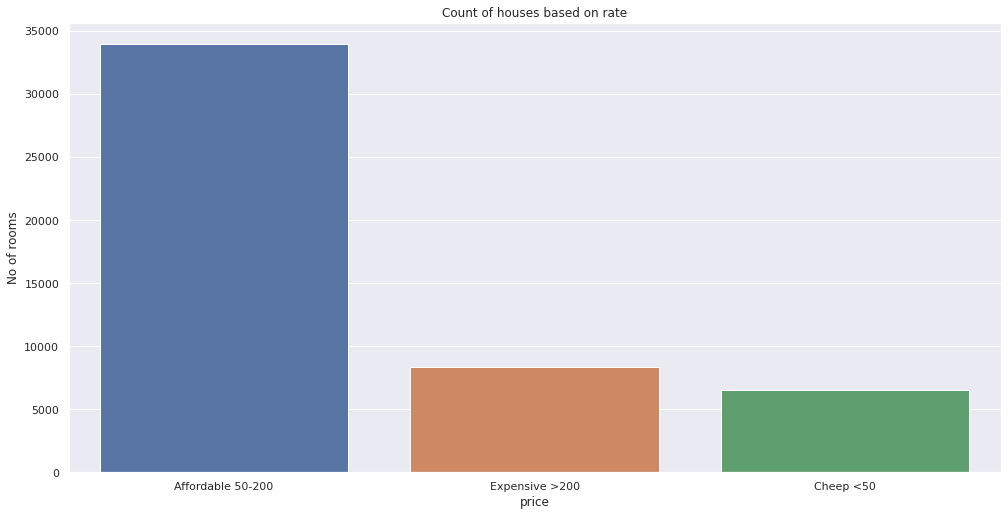

In [35]:
'''
dividing price range in 3 groups 
1) cheep i.e price below 50
2) affordable i.e price betwenn 50 & 200
3) expensive i.e price above 200
'''
def price_catagory(price):
  if price<=50:
    return 'Cheep <50'
  elif price>=50 and price<=200:
    return 'Affordable 50-200'
  else:
    return 'Expensive >200'
#creating a count plot 
sns.countplot(x=df.price.apply(price_catagory)).set_title('Count of houses based on rate')
#adding y label to the plot
plt.ylabel('No of rooms')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


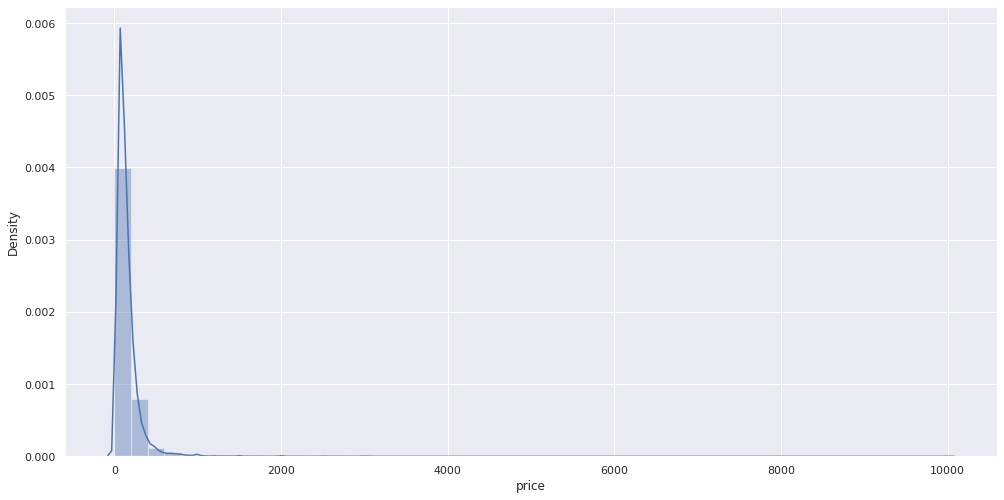

In [36]:
sns.distplot(df.price)

**Column NO. 10 : minimum_nights**

1. The graph is a right screwed (positive skewness).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'No of rooms')

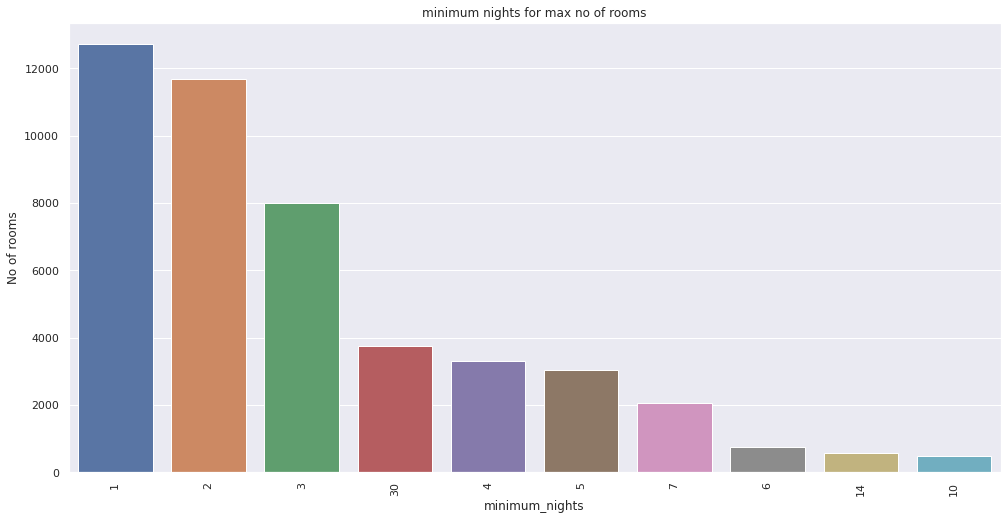

In [37]:
#creating a count plot 
sns.countplot(df.minimum_nights,order=df.minimum_nights.value_counts().iloc[:10].index).set_title('minimum nights for max no of rooms')
#rotating x lables 
plt.xticks(rotation=90)
#adding x and y labels to the plot
plt.ylabel('No of rooms')

This plots shows that majority of room booking are for 1 to 4 and then for 30 CHANGE Y AXIS NAME days

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'min nights density plot befor removeing outliers')

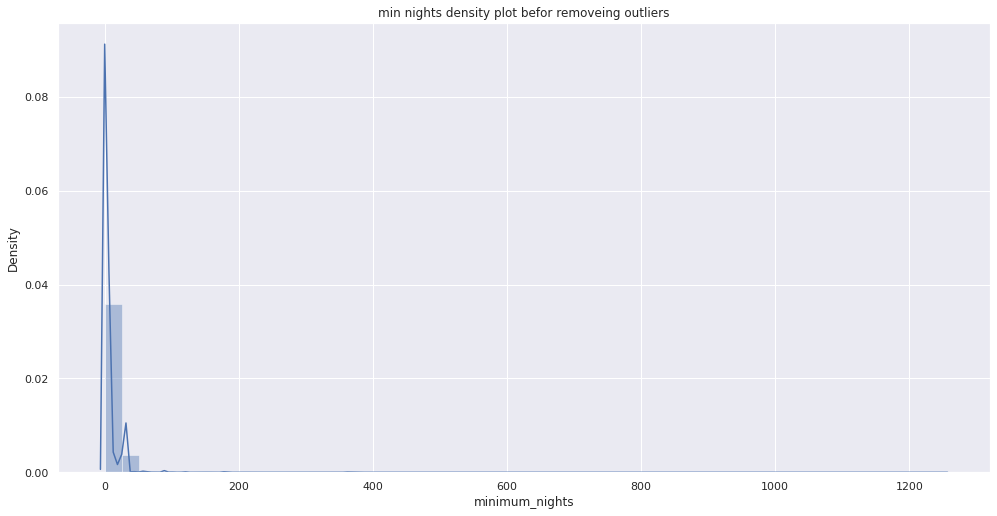

In [38]:
sns.distplot(df_with_na.minimum_nights).set_title('min nights density plot befor removeing outliers')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'min nights density plot after removeing outliers')

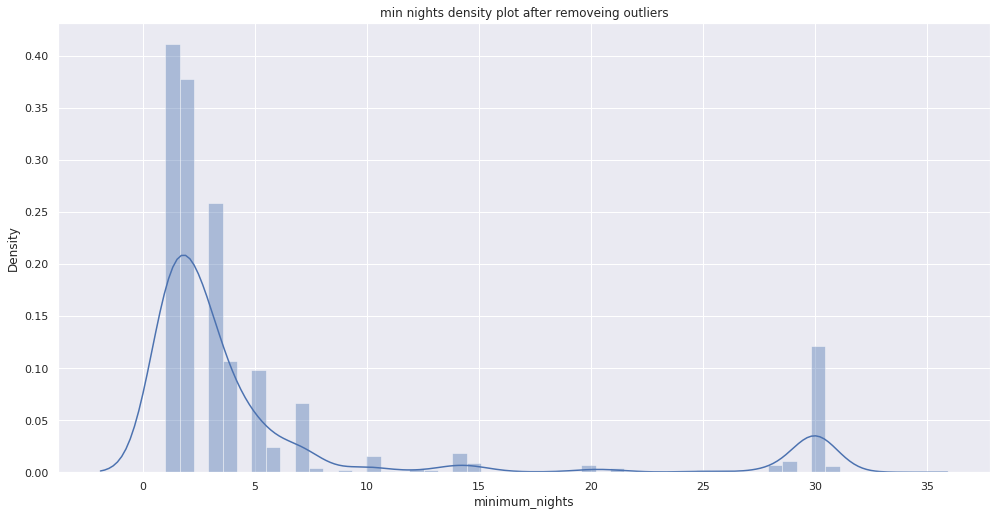

In [39]:
# subsetting the df with values of min night under 35
min_nights_df=df[df.minimum_nights<35]
#creating a distplot
sns.distplot(min_nights_df.minimum_nights).set_title('min nights density plot after removeing outliers')

**Column NO. 11 : number_of_reviews**

This column tells us about the number of reviews an apartment has got so far where the min value is 0 its cause can be

1. no one has visited this place
2. no one has reviewed
3. the values are missing

It has a mean of 32, median of 10, and max of 629 rating

From the graph, we can say that it is a right screwed (positive skewness) with very few homes rated above 200



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


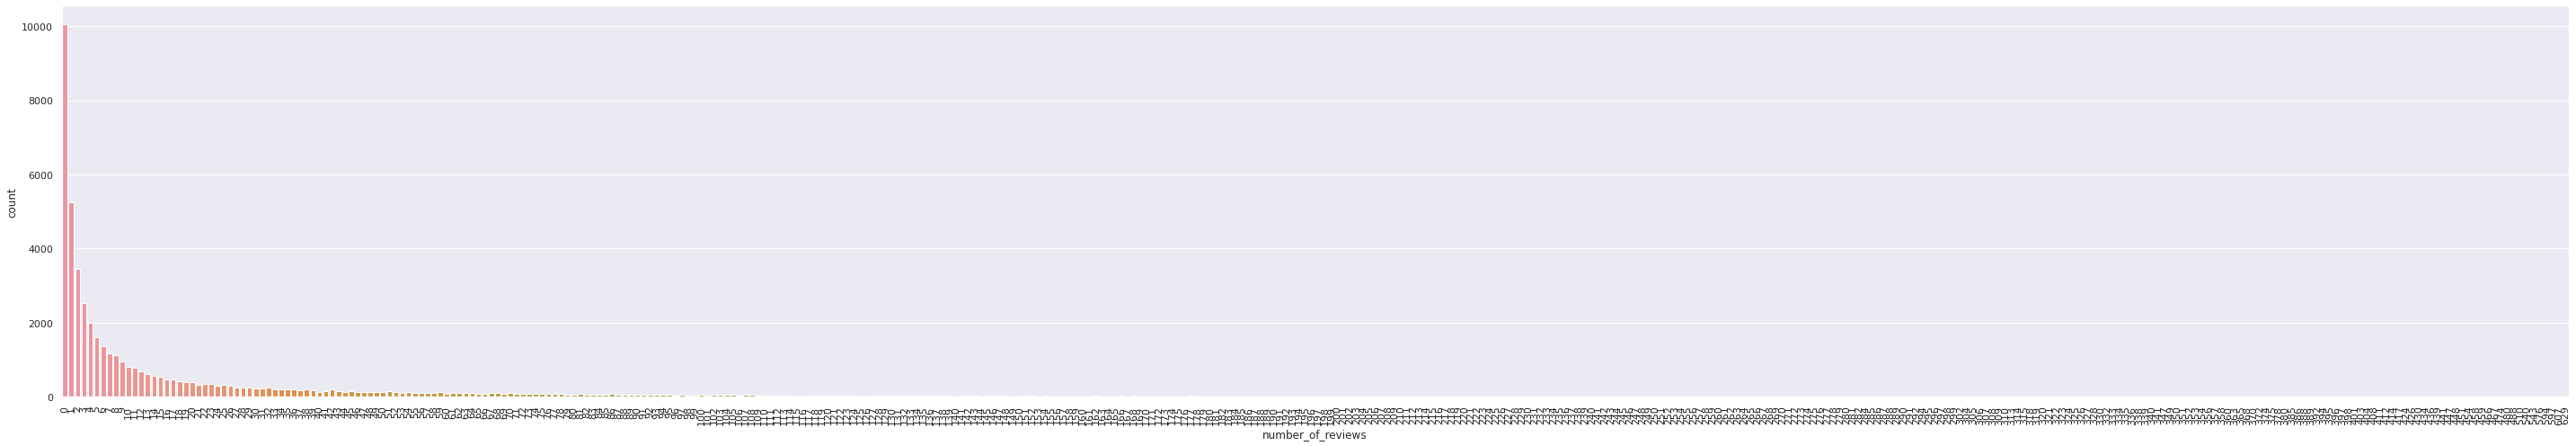

In [40]:
#settingt he size of the figure 
plt.figure(figsize=(50,8))
#creating a caunt plot
sns.countplot(df.number_of_reviews)
#rotating the x lables
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


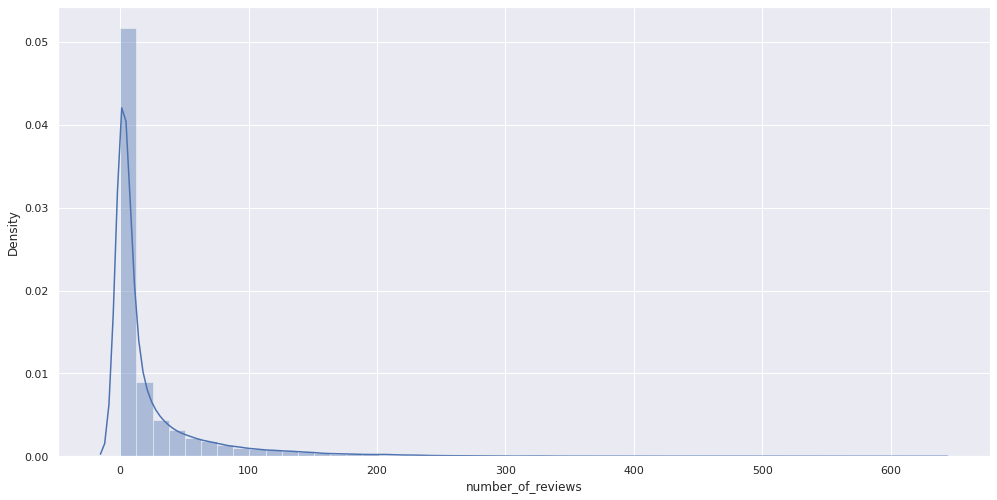

In [41]:
#creating a dist plot
sns.distplot(df.number_of_reviews)

**Column NO. 12 : last_review**

In [42]:
df['last_review']=pd.to_datetime(df['last_review'])
df.last_review

0       2018-10-19
1       2019-05-21
2              NaT
3       2019-07-05
4       2018-11-19
           ...    
48890          NaT
48891          NaT
48892          NaT
48893          NaT
48894          NaT
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [43]:
#printing the least and most recent review date
least_recent_date = df['last_review'].min()
most_recent_date = df['last_review'].max()
print(f'the least recent date is {least_recent_date.date()} and the most recent date is {most_recent_date.date()} in last review')

the least recent date is 2011-03-28 and the most recent date is 2019-07-08 in last review


In [44]:
df[df.last_review < '2015-01-01'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 20 to 6546
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              279 non-null    int64         
 1   name                            279 non-null    object        
 2   host_id                         279 non-null    int64         
 3   host_name                       279 non-null    object        
 4   neighbourhood_group             279 non-null    object        
 5   neighbourhood                   279 non-null    object        
 6   latitude                        279 non-null    float64       
 7   longitude                       279 non-null    float64       
 8   room_type                       279 non-null    object        
 9   price                           279 non-null    int64         
 10  minimum_nights                  279 non-null    int64         
 11  numb

In [45]:
df[df.last_review.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10052 entries, 2 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10052 non-null  int64         
 1   name                            10042 non-null  object        
 2   host_id                         10052 non-null  int64         
 3   host_name                       10047 non-null  object        
 4   neighbourhood_group             10052 non-null  object        
 5   neighbourhood                   10052 non-null  object        
 6   latitude                        10052 non-null  float64       
 7   longitude                       10052 non-null  float64       
 8   room_type                       10052 non-null  object        
 9   price                           10052 non-null  int64         
 10  minimum_nights                  10052 non-null  int64         
 11  nu

This column tells us about the when an apartment got his last review an apartment where there are some missing values its reason can be that

1. no one has visited this place
2. no one has reviewed
3. the values are missing

The least_recent_date is 2011-04-25 and the most_recent_date is 2019-07-08 in last review

we can conclude that these apartments may have been closed or not available as no one has reviewed them for 50 years

there are a total of 94 apartments that haven't been reviewed in the last 5 years and 5207 absent data



**Column NO. 13 : reviews_per_month**

In [46]:
df.reviews_per_month.describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

Text(0, 0.5, 'No of rooms')

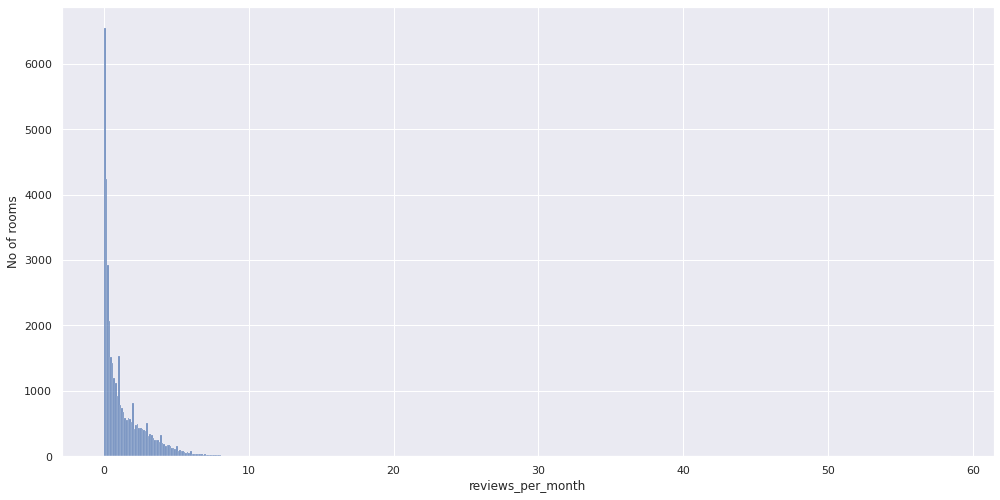

In [47]:
#creating histplot and adding lablesto y axis
sns.histplot(df[df['reviews_per_month']>0].reviews_per_month)
plt.ylabel('No of rooms')

observations

1. very less amount of houses have review per month greater than 5
2. columns has a mean of 0.92 and a max of 58.5

**Column NO. 14 : calculated_host_listings_coun**

In [48]:
#grouping by host id and taking sum of reviews per month
top_10_host_listings_count=df.groupby(['host_id']).agg({'calculated_host_listings_count':'max'}).sort_values('calculated_host_listings_count',ascending=False).reset_index()
#taking top 10 from df and storing it in list  
top_10_host_listings_count_list=top_10_host_listings_count[:10]['host_id'].tolist()
# finding the names of all the top 10 host by host id 
top_10_host_listings_count_df=df[df.host_id.isin(top_10_host_listings_count_list)].sort_values('calculated_host_listings_count',ascending=False)

<Figure size 1202.4x595.44 with 0 Axes>

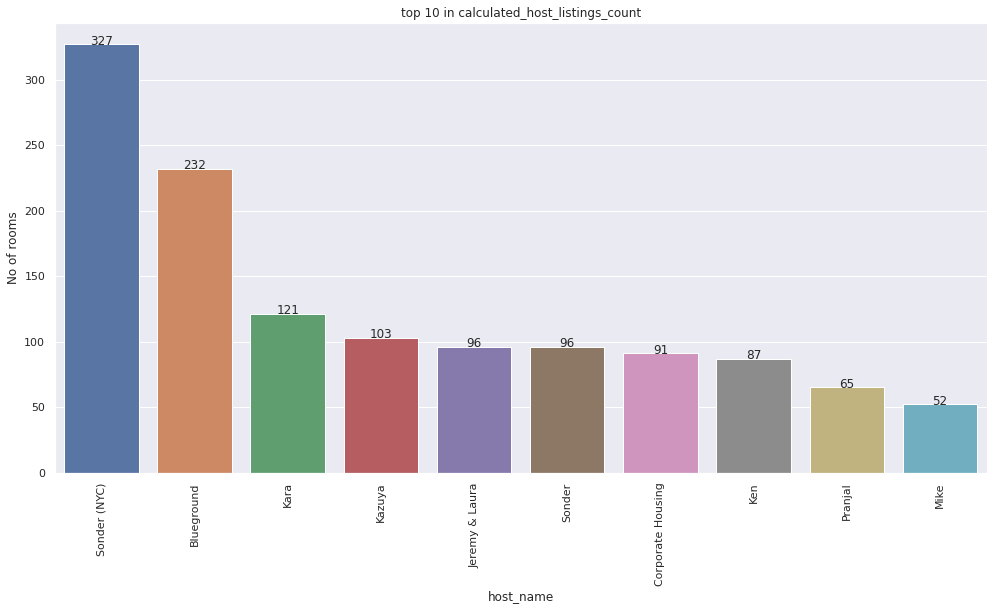

<Figure size 1202.4x595.44 with 0 Axes>

In [49]:
# code to add the count on top of bar graph
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

#creating a bar graph 
sns.barplot(x="host_name", y='calculated_host_listings_count' ,data=top_10_host_listings_count_df).set_title('top 10 in calculated_host_listings_count')
# adding lables on bar graph
addlabels(top_10_host_listings_count_df.host_name.unique().tolist(),top_10_host_listings_count[:10]['calculated_host_listings_count'].tolist())
#adding y label to plot 
plt.ylabel('No of rooms')
plt.xticks(rotation=90)
plt.figure(figsize=(16.7,8.27)) 

observation

The top hosts with max listing count are sonder(NYC) followed by Blueground with 327 and 232 rooms respectively

**Column NO. 15 : availability_365**

In [50]:
df.availability_365.describe()  

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1440x595.44 with 0 Axes>

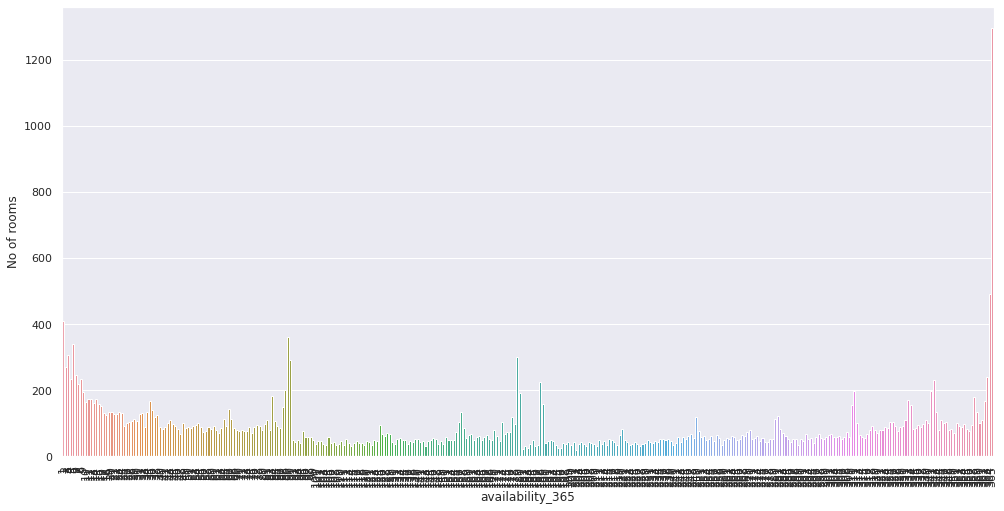

<Figure size 1440x595.44 with 0 Axes>

In [51]:
df_365_0=df.loc[df['availability_365']>0]
sns.countplot(df_365_0.availability_365)
plt.xticks(rotation=90)
plt.ylabel('No of rooms')
plt.figure(figsize=(20,8.27)) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'availability_365 density plot befor removeing outliers')

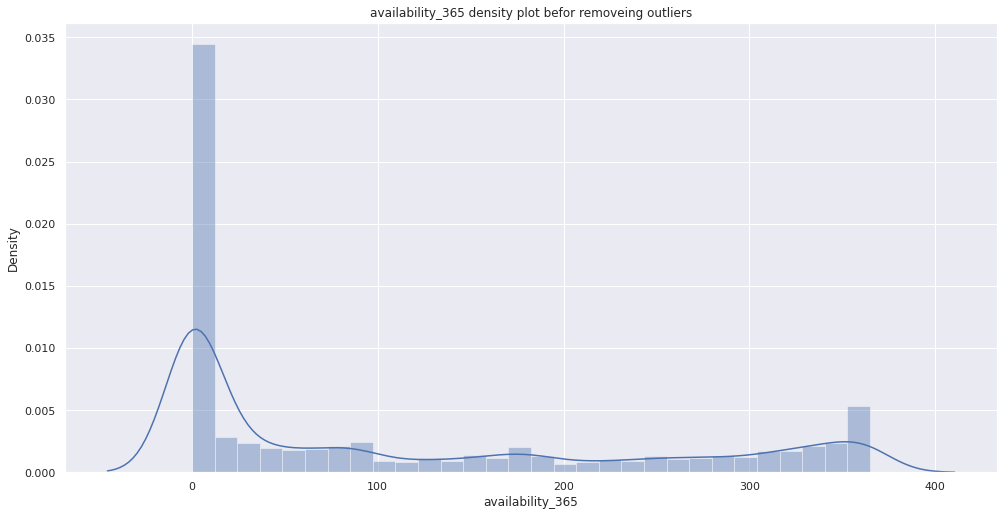

In [52]:
sns.distplot(df.availability_365).set_title("availability_365 density plot befor removeing outliers")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'availability_365 density plot after removeing outliers')

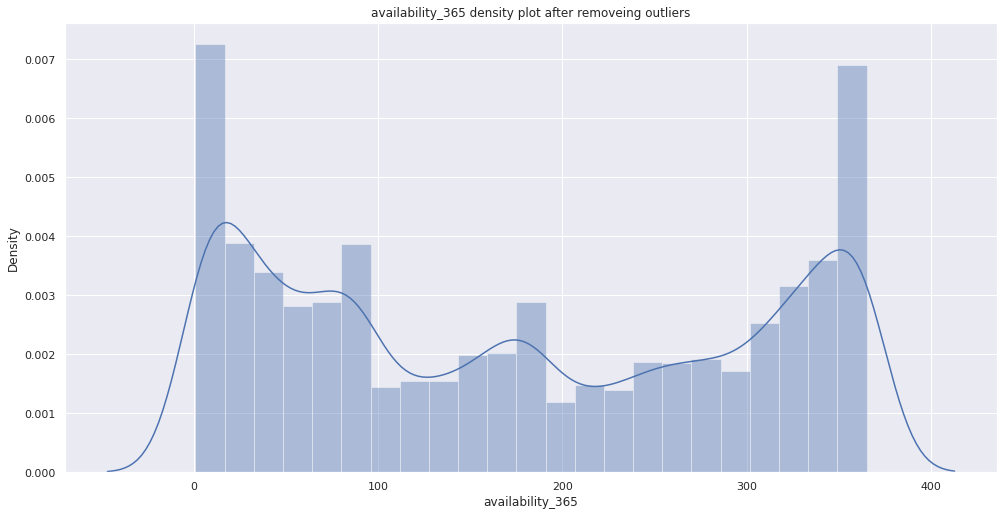

In [53]:
df_365_0=df.loc[df['availability_365']>0]
sns.distplot(df_365_0.availability_365).set_title("availability_365 density plot after removeing outliers")

Observations

most of the rooms are either available for less than 16 days or almost full year

**Data cleaing and wrangling**

after looking into dataset, column 'id','name', 'last_review' is irrelevent for to our data analysis. missing value does not need special treatment. column 'reviews_per_month' has ~10,000 NaN value which can be converted into 0.0.

In [54]:
#drooping columns 
df.drop(['last_review'], axis=1, inplace=True)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [55]:
#converting nul values of host name to host ids
df['host_name']= df['host_name'].fillna(df['host_id'])
#replacing nan values with blank space
df['name'] = df['name'].fillna(df['neighbourhood']+df['room_type'])

In [56]:
#converting all NaN value to zero.
df.fillna(0,inplace=True)
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


number of listed properties which available for zero days can be drop. As we assuming, they delisted there properties.

In [57]:
##remove rows where price is zero &avalibaility_365==0
df_del_index = df[(df['price']==0) | (df['availability_365']==0)].index
df_del = df[(df['price']==0) | (df['availability_365']==0)]   
##remove rows where avalibaility_365==0
df.drop(df_del_index,inplace=True)

In [58]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31354 non-null  int64  
 1   name                            31354 non-null  object 
 2   host_id                         31354 non-null  int64  
 3   host_name                       31354 non-null  object 
 4   neighbourhood_group             31354 non-null  object 
 5   neighbourhood                   31354 non-null  object 
 6   latitude                        31354 non-null  float64
 7   longitude                       31354 non-null  float64
 8   room_type                       31354 non-null  object 
 9   price                           31354 non-null  int64  
 10  minimum_nights                  31354 non-null  int64  
 11  number_of_reviews               31354 non-null  int64  
 12  reviews_per_month               

number of neighboorhood group and neighbourhood are liste

In [59]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [60]:
#number of neighbourhood listed?
len(df['neighbourhood'].unique())

218

In [61]:
#number of types of room listed
df['room_type'].value_counts()

Entire home/apt    16532
Private room       13960
Shared room          862
Name: room_type, dtype: int64

set figure size

In [62]:
#set figure size
sns.set(rc={'figure.figsize':(11.7,8.27)}) 

**data visuvalization**

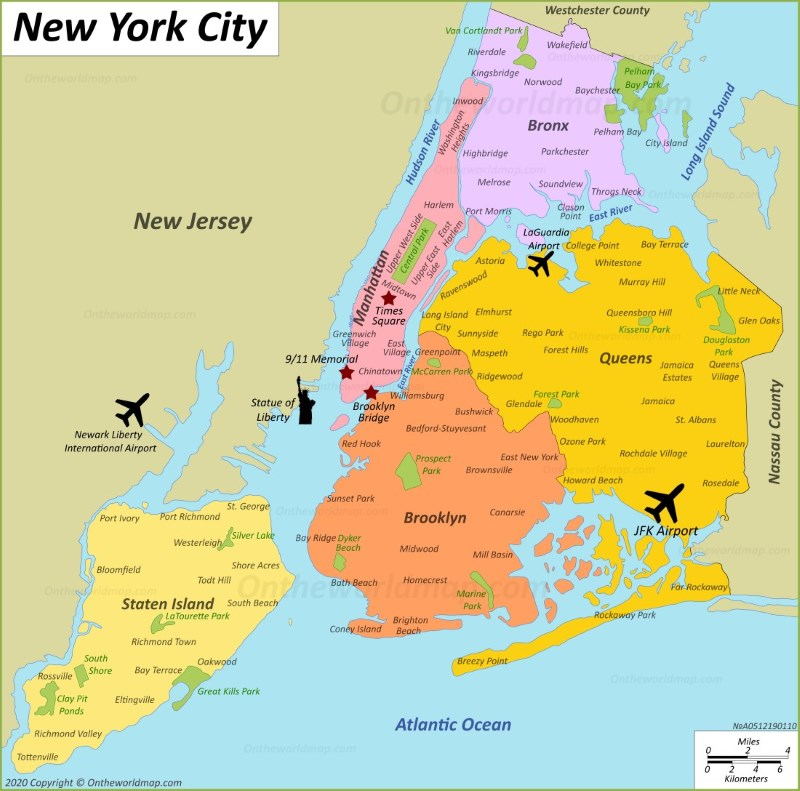

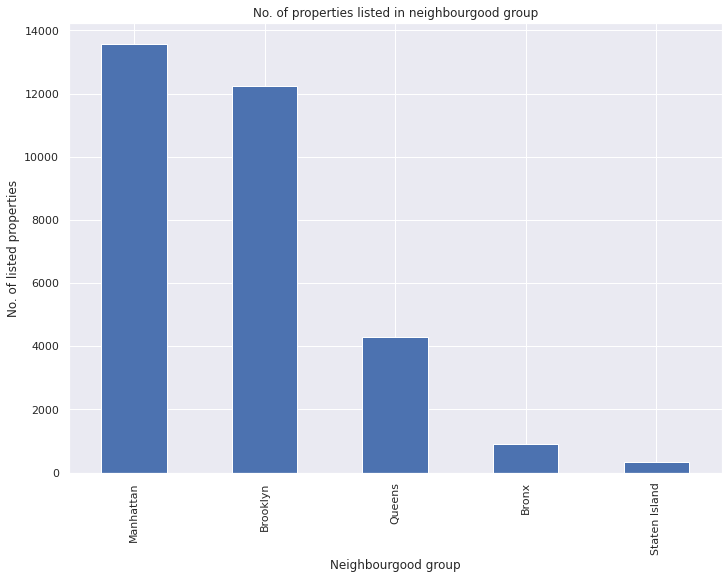

In [63]:
#number of listing at neughbourhood group
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.title('No. of properties listed in neighbourgood group')
plt.xlabel('Neighbourgood group')
plt.ylabel('No. of listed properties')
plt.show()

In [64]:
df.groupby('neighbourhood_group')['price'].max().reset_index()

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,8000
2,Manhattan,10000
3,Queens,2600
4,Staten Island,5000


Text(0.5, 1.0, 'Top 15 areas that have highest number of listing')

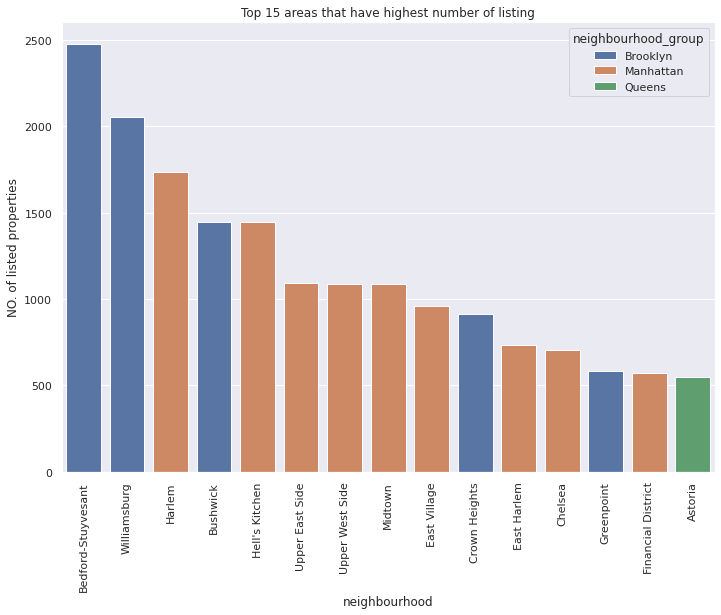

In [65]:
#top planning areas
top_planing_area=df.groupby(['neighbourhood_group']).neighbourhood.value_counts(ascending=True).sort_values(ascending=False).head(15).to_frame('NO. of listed properties').reset_index()
a=sns.barplot(x='neighbourhood',y='NO. of listed properties',hue='neighbourhood_group',data=top_planing_area,dodge = False)
plt.xticks(rotation=90)
a.set_title('Top 15 areas that have highest number of listing')

**1. if we have higher min nights does that mean price per night will be less ( need more analysis) and is there any relation between any columns**

Minimum night and price per night is not corealted.

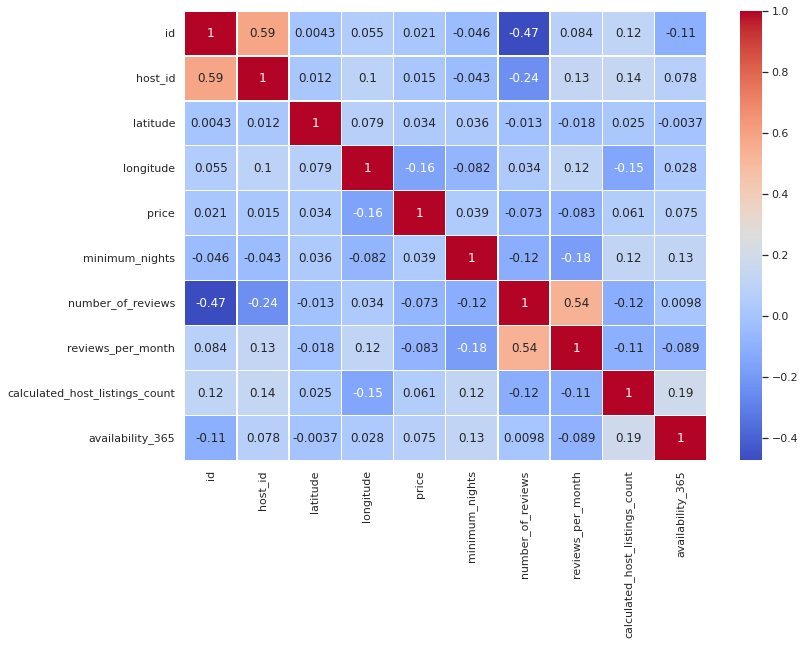

In [66]:
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm',linewidths=.5)

1. No relations is detected from the above graph except review_per_month and no_of_reviews.

Reason : for a room if the no of reviews is greater there are higher chances that reviews_per_month will also be higher

In [67]:
## if we have higher min nights does that mean price per night will be less     
df.groupby(['room_type','minimum_nights'])

In [68]:
minimum_night_price = df.groupby(['room_type','minimum_nights'],
                                 as_index=False)['price'].median()
minimum_night_price.loc[~(minimum_night_price['minimum_nights'] == 999)] 
minimum_night_price.loc[~((minimum_night_price['price'] >= 500) )] 

,room_type,minimum_nights,price
0,Entire home/apt,1,160.0
1,Entire home/apt,2,175.0
2,Entire home/apt,3,175.0
3,Entire home/apt,4,179.0
4,Entire home/apt,5,175.0
...,...,...,...
166,Shared room,30,35.0
167,Shared room,31,29.5
168,Shared room,90,25.0
169,Shared room,100,33.0


**2. availability 365 is proportional to review per month**

In [69]:
#av_365_rew = df.loc[~((df['reviews_per_month'] == 0))].reset_index()
#av_df.loc[~(df==0).all(axis=1)]
#av_365rew.head(3)
av_365_rew = df.loc[~((df['reviews_per_month'] == 0))].reset_index()
av_365_rew.head(3)

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194


In [70]:
av_365_rew=av_365_rew.loc[:,['neighbourhood_group',"neighbourhood",'room_type','reviews_per_month','availability_365']]
av_365_rew.head(3)

,neighbourhood_group,neighbourhood,room_type,reviews_per_month,availability_365
0,Brooklyn,Kensington,Private room,0.21,365
1,Manhattan,Midtown,Entire home/apt,0.38,355
2,Brooklyn,Clinton Hill,Entire home/apt,4.64,194


In [71]:
av_365_rewi=av_365_rew.groupby(['neighbourhood_group','room_type','availability_365'])['reviews_per_month'].mean().reset_index()
av_365_rewi[av_365_rewi['room_type']=='Private room']

,neighbourhood_group,room_type,availability_365,reviews_per_month
187,Bronx,Private room,1,1.3575
188,Bronx,Private room,2,1.0000
189,Bronx,Private room,3,1.3400
190,Bronx,Private room,5,3.3900
191,Bronx,Private room,6,2.1000
...,...,...,...,...
3120,Staten Island,Private room,360,1.9250
3121,Staten Island,Private room,362,1.1700
3122,Staten Island,Private room,363,3.0875
3123,Staten Island,Private room,364,1.0000


In [72]:
av_365_req3 = av_365_rewi.loc[((av_365_rewi['neighbourhood_group']=='Bronx') & (av_365_rewi['room_type']=='Entire home/apt'))]
#av_365_req3.plot(x='availability_365',y='reviews_per_month',kind="bar")
#plt.xlabel('availability_365')
#plt.ylabel('review_per_month')
#plt.show()

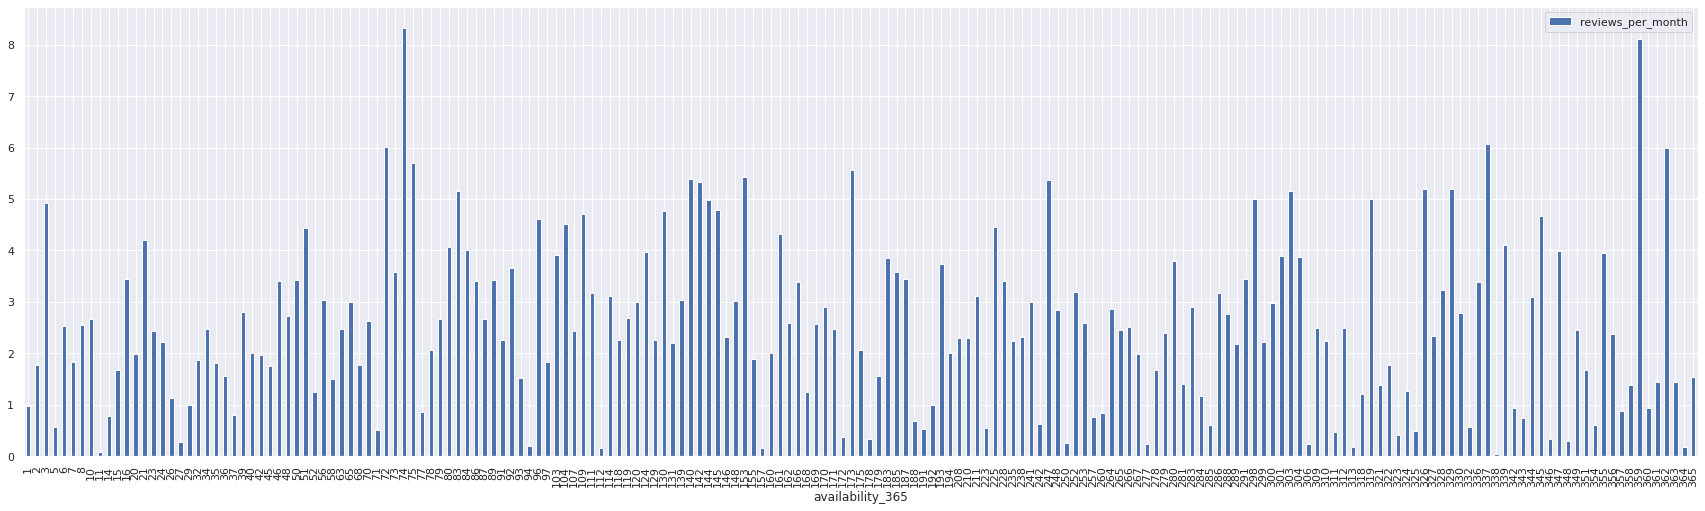

In [73]:
sns.set(rc={'figure.figsize':(30,8.27)}) 
av_365_req3.plot(x='availability_365',y='reviews_per_month',kind='bar',style='o') #for entire hoem/apt at bronx
plt.show()

**3. word used to attract people**

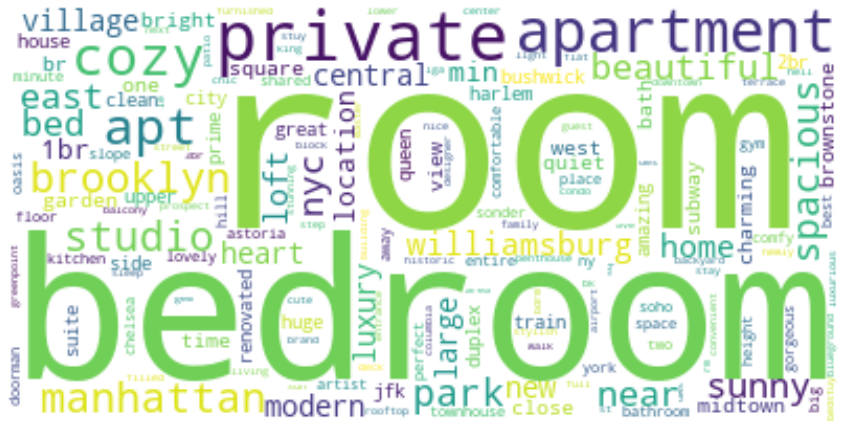

In [74]:
#Creating the text variable
df_name = df[df['name']!=0]
text = " ".join(name for name in df_name.name)
text=text.lower()

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
sns.set(rc={'figure.figsize':(15,11)})
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**4) does no of review affect the price**

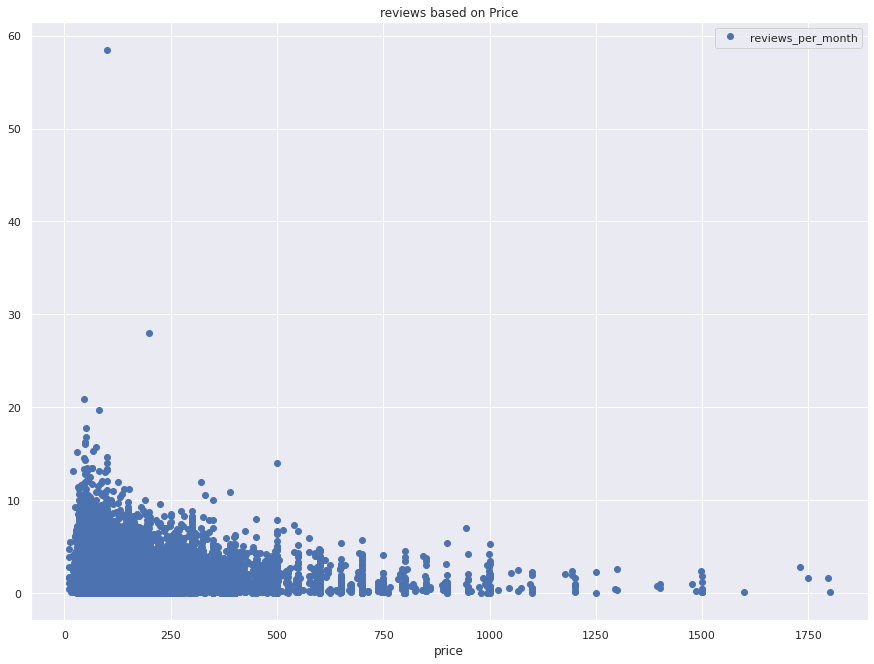

In [75]:
price_review = df[['reviews_per_month', 'price']].sort_values(by = 'price')
price_review=price_review.loc[price_review['reviews_per_month']>0]
price_review=price_review.loc[price_review['price']<2000]
price_review.plot(x = 'price', y = 'reviews_per_month', 
                  style = 'o',
                  title = 'reviews based on Price')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f99ac4842d0>>

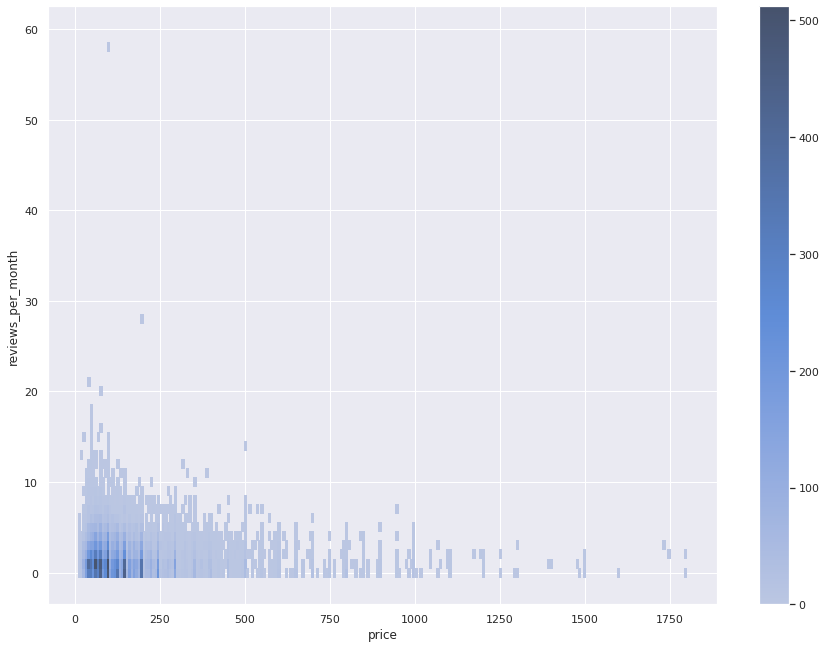

In [76]:
sns.histplot(data = price_review, x = 'price', y = 'reviews_per_month',discrete=(False,True),cbar=True).set

Observations

1) review per month of price range between 0 & 250 is more by which we can conclude that most people prefer renting rooms which have a price below 250

2) reviews per month decrease as you increase the price



**5) Which neighbourhood is most expensive in NewYork City? (at each neighbourhood-group)**
1. At manhattan, Tribecca and flatiron district.
2. At brooklyn, Dumbo
3. At Bronx, Riverdale
4. At queens, ponsit
5. At Staten Island, Fort wastword
**minimum and maximum price neighbourhood wise**

In [77]:
nei_max = df.groupby(['neighbourhood_group','neighbourhood'])['price'].max().reset_index()
nei_min =df.groupby(['neighbourhood_group','neighbourhood'])['price'].min().reset_index()
nei_avg =df.groupby(['neighbourhood_group','neighbourhood'])['price'].median().reset_index()

**find out number of airbnb acomodation facility at neighboorhood of manhattan**